In [2]:
import pickle
import torch

In [5]:
dataset = pickle.load(open("./mosi_data_noalign.pkl", 'rb'))

In [6]:
dataset.keys()

dict_keys(['train', 'valid', 'test'])

In [9]:
for key in dataset['train'].keys():
    print(key, dataset['train'][key].shape)

id (1284, 3)
labels (1284, 1, 1)
vision (1284, 500, 20)
text (1284, 50, 300)
audio (1284, 375, 5)


In [3]:
import os

scores = {} # scores is an empty dict already
target = "./mosi_data_noalign.pkl"
if os.path.getsize(target) > 0:      
    with open(target, "rb") as f:
        dataset = pickle.Unpickler(f)
        scores = dataset.load()

In [4]:
scores['train']['id'][:10, :]

array([[b'03bSnISJMiM_11', b'95.05646259', b'97.2015873'],
       [b'03bSnISJMiM_10', b'93.54988662', b'95.05646259'],
       [b'03bSnISJMiM_13', b'168.8387755', b'170.485034'],
       [b'03bSnISJMiM_12', b'97.2015873', b'99.89546485'],
       [b'03bSnISJMiM_1', b'52.73265306', b'56.04512472'],
       [b'03bSnISJMiM_3', b'66.87052154', b'68.84603175'],
       [b'03bSnISJMiM_2', b'56.51405896', b'66.87052154'],
       [b'03bSnISJMiM_5', b'71.07097506', b'71.8292517'],
       [b'03bSnISJMiM_4', b'68.84603175', b'71.07097506'],
       [b'03bSnISJMiM_7', b'73.71496599', b'78.6138322']], dtype='|S14')

In [17]:
audio = scores['train']['audio']

In [46]:
text = scores['train']['text']

<AxesSubplot:>

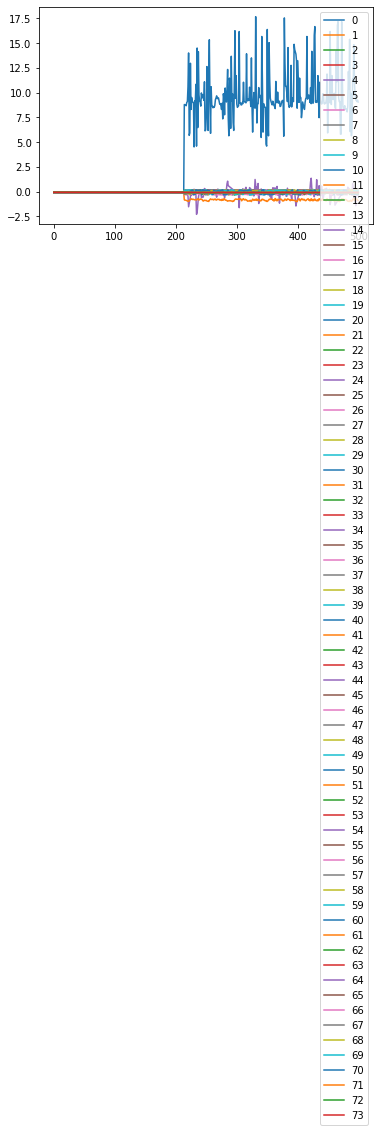

In [24]:
import pandas as pd
import numpy as np

exmple_audio = audio[2, :]
exmple_audio = (exmple_audio - np.mean(audio)) / np.std(audio)
exmple_audio = pd.DataFrame(exmple_audio)
exmple_audio.plot()

<AxesSubplot:>

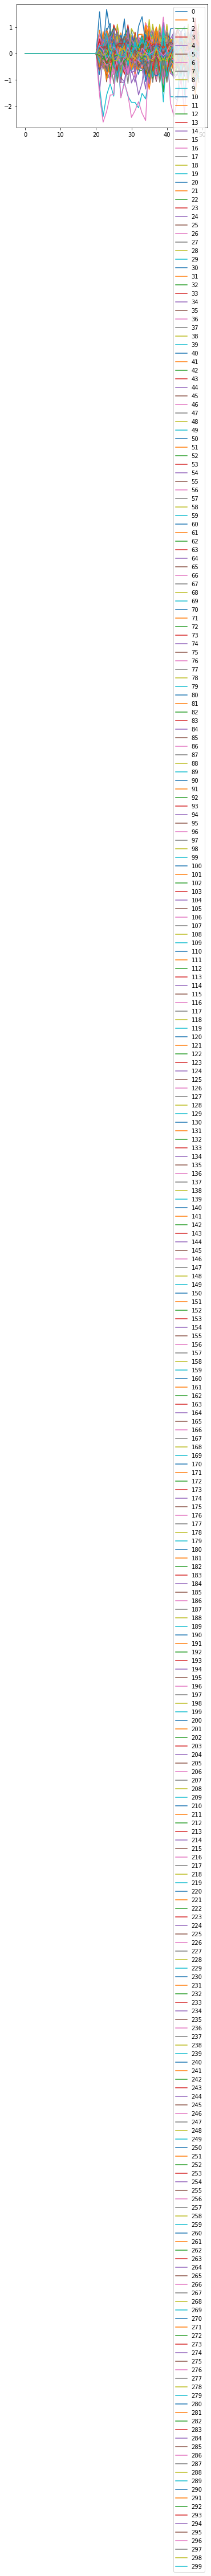

In [48]:
exmple_text = text[20, :]
# exmple_text = (exmple_audio - np.mean(text)) / np.std(text)
exmple_text = pd.DataFrame(exmple_text)
exmple_text.plot()

In [49]:
exmple_audio = np.float32(audio)
exmple_audio = (exmple_audio - np.mean(audio.reshape(-1, 74), axis=0)) / np.std(audio.reshape(-1, 74), axis=0)
exmple_audio = pd.DataFrame(exmple_audio[2, :])
exmple_audio.plot()

MemoryError: Unable to allocate 2.25 GiB for an array with shape (8163000, 74) and data type float32

## ASR DATA

In [12]:
import os

scores = {} # scores is an empty dict already
target = "./mosi_data_noalign.pkl"
if os.path.getsize(target) > 0:      
    with open(target, "rb") as f:
        dataset = pickle.Unpickler(f)
        scores = dataset.load()

In [22]:
meta = scores['train']['id']
meta[0]

array([b'03bSnISJMiM_11', b'95.05646259', b'97.2015873'], dtype='|S14')

In [20]:
META_decoded = [meta[0, 0].decode('UTF-8'), META[0, 1].decode('UTF-8'), META[0, 2].decode('UTF-8')]

In [23]:
META_decoded[0]

'03bSnISJMiM_11'

## Text file (.txt) Read to dict

In [67]:
import glob

file_list = glob.glob("/home/ubuntu/Armin/Multimodal/CMU-MOSI/Raw/Transcript/Segmented/*.annotprocessed")
main_path = '/home/ubuntu/Armin/Multimodal/CMU-MOSI/Raw/Transcript/Segmented/'

In [79]:
import pandas as pd
import os
# 

dataset_text = {}
for video_path in file_list:
    file_directory = video_path
    text_ = pd.read_csv(file_directory)
    index, data = text_.columns[0].split('_DELIM_')
    video_id = video_path.split(main_path)[-1].split('.annotprocessed')[0]
    dataset_text[f"{video_id}_{index}"] = data
    for indx in range(len(text_)):
        index, data = text_.iloc[indx, 0].split('_DELIM_')
        dataset_text[f"{video_path.split(main_path)[-1].split('.annotprocessed')[0]}_{index}"] = data
dataset_text

{'2WGyTLYerpo_1': ' MUCH SAY THAT I REALLY ENJOYED COWBOYS AND ALIENS',
 '2WGyTLYerpo_2': 'THERE WAS A LOT OF FUN',
 '2WGyTLYerpo_3': 'YOU GUYS DONT KNOW WHAT YOURE GONNA GO AND SEE WHEN YOU GO WALK INTO THE MOVIE CALLED COWBOYS AND ALIENS',
 '2WGyTLYerpo_4': ' IF YOURE EXPECTING SOME ARTSY SERIOUS OSCAR CONTENDER THAN YOURE WRONG',
 '2WGyTLYerpo_5': ' THE ONLY OSCAR THAT I CAN EVEN THING OF IS MAYBE LIKE BEST CINEMATOGRAPHY',
 '2WGyTLYerpo_6': ' BECAUSE THE CINEMATOGRAPHY IN THIS MOVIE IS GREAT',
 '2WGyTLYerpo_7': 'AND MAYBE BEST VISUAL EFFECTS',
 '2WGyTLYerpo_8': 'COZ THE VISUAL EFFECTS ARE PRETTY COOL',
 '2WGyTLYerpo_9': 'BUT AGAIN YOU YOU CANT EXPECT A HUGE LIKE SURREAL MIND BENDER FROM THE MOVIE CALLED COWBOYS AND ALIENS YO',
 '2WGyTLYerpo_10': 'AND ITS SATISFACTORY',
 '2WGyTLYerpo_11': 'THE ACTION IS REALLY INTENSE WHICH SURPRISED ME ',
 '2WGyTLYerpo_12': 'I DIDNT EXPECT THE ACTION TO BE SO INTENSE',
 '2WGyTLYerpo_13': ' THERES SOME REALLY INTENSE ACTION SCENES ESPECIALLY THE SCE

In [82]:
# torch.save(dataset_text, 'mosi_text.dict')

In [83]:
mosi_text = torch.load('mosi_text.dict')

In [85]:
import os

scores = {} # scores is an empty dict already
target = "./mosi_data_noalign.pkl"
if os.path.getsize(target) > 0:      
    with open(target, "rb") as f:
        dataset = pickle.Unpickler(f)
        mosi_dataset = dataset.load()

In [91]:
mosi_data_noalign
splits = ['train', 'test', 'valid']
for split in splits:
    meta = mosi_dataset[split]['id']
    dataset_text_ = []
    for idx in range(len(meta)):
        dataset_text_.append(mosi_text[meta[idx, 0].decode('UTF-8')])
    mosi_dataset[split]['text_'] = dataset_text_

In [95]:
torch.save(mosi_dataset, 'mosi_with_text_data_noalign.pkl')

In [110]:
# !wget "http://immortal.multicomp.cs.cmu.edu/CMU-MOSI/language/CMU_MOSI_TimestampedPhones.csd"
!wget 'http://immortal.multicomp.cs.cmu.edu/CMU-MOSI/language/CMU_MOSI_TimestampedWords.csd'

--2020-08-16 21:00:06--  http://immortal.multicomp.cs.cmu.edu/CMU-MOSI/language/CMU_MOSI_TimestampedWords.csd
Resolving immortal.multicomp.cs.cmu.edu (immortal.multicomp.cs.cmu.edu)... 128.2.211.216
Connecting to immortal.multicomp.cs.cmu.edu (immortal.multicomp.cs.cmu.edu)|128.2.211.216|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1164309 (1.1M) [audio/csound]
Saving to: 'CMU_MOSI_TimestampedWords.csd'

CMU_MOSI_Timestampe 100%[===================>]   1.11M   227KB/s    in 5.0s    

2020-08-16 21:00:12 (227 KB/s) - 'CMU_MOSI_TimestampedWords.csd' saved [1164309/1164309]



In [99]:
import h5py 
f = h5py.File('CMU_MOSI_TimestampedPhones.csd', 'r')

In [109]:
f['phoneme']['data']['03bSnISJMiM']['features'][:100, 0]

array([b'sp', b'ow1', b'sp', b'dh', b'ih1', b's', b'sp', b'k', b'w',
       b'aa1', b'l', b'ah0', b't', b'iy0', b'ah0', b'z', b'sp', b'hh',
       b'ao1', b'r', b'ah0', b'b', b'ah0', b'l', b'sp', b'ow1', b'k',
       b'ey1', b'w', b'eh1', b'l', b'sp', b'eh1', b'n', b'iy0', b'hh',
       b'aw2', b'sp', b'ah1', b'm', b'dh', b'ah0', b's', b'sp', b'ah0',
       b'z', b'ah0', b'n', b'd', b'ay1', b'jh', b'ah0', b's', b't', b'sp',
       b'w', b'ao1', b'n', b't', b'ah0', b'd', b't', b'ih0', b'd', b'uw1',
       b'sp', b'ah0', b'r', b'iy2', b'v', b'y', b'uw1', b'sp', b'ah1',
       b'v', b'dh', b'ah0', b'm', b'uw1', b'v', b'iy0', b'sp', b'hh',
       b'ae1', b'n', b'ah0', b'k', b'aa1', b'z', b'sp', b'ay1', b'jh',
       b'ah0', b's', b't', b'w', b'aa1', b'ch', b't', b'ah0'], dtype='|S8')

In [111]:
f = h5py.File('CMU_MOSI_TimestampedWords.csd', 'r')

In [116]:
f['words']['data']['03bSnISJMiM']['features'][:10]

array([[b'sp'],
       [b'oh'],
       [b'sp'],
       [b'this'],
       [b'sp'],
       [b'quality'],
       [b'is'],
       [b'sp'],
       [b'horrible'],
       [b'sp']], dtype='|S32')

In [117]:
f['words']['data']['03bSnISJMiM']['intervals'][:10]

array([[0.01247166, 1.72857143],
       [1.72857143, 2.11768707],
       [2.11768707, 5.16077098],
       [5.16077098, 5.79931973],
       [5.79931973, 6.8968254 ],
       [6.8968254 , 7.5154195 ],
       [7.5154195 , 7.75487528],
       [7.75487528, 7.8047619 ],
       [7.8047619 , 8.63287982],
       [8.63287982, 9.8600907 ]])